In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.7 kB/s 
     |████████████████████████████████| 8.8 MB 30.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/song_features.csv"
df = pd.read_csv(path)


Splitting our Data

In [5]:
#Select relevant features
features_of_interest = ["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness",\
                        "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"]

#Shuffle Dataset
df = df.sample(frac=1, random_state = 19).reset_index(drop=True)

#80/20 Split between Train and Test
train, test = train_test_split(df, test_size=0.2)

train.to_csv("/content/drive/My Drive/song_features_train.csv")
test.to_csv("/content/drive/My Drive/song_features_test.csv")


#Subdivide training test into its features and labels
trainx = train[features_of_interest]
trainy = train["genre"]

testx = test[features_of_interest]
testy = test["genre"]

Data Exploration

In [ ]:
print(df.head())

         msd_track_id         msd_song_id              spotify_id  \
0  TRJGHEQ128F425D555  SOWBYKV12A58A7B59B  3oM7fg2JQI9OmQbdDLEvTH   
1  TRTFLOJ128F92DEDF7  SOVRTVL12AAF3B40CF  6db4gc5GVSVFzaw3Jk1mIg   
2  TRSBNIX128F147FD41  SOWXVSD12A6D4F7FEA  07BYWgha9jJyF6MQdEC2f9   
3  TROCQDV12903CBB687  SOQUEAF12B0B80C2E1  3MdayKObHdQaxDc9edokB4   
4  TRADDEU128F422F04A  SONSQND12A8AE47A07  69ZjjdibjAQ3tHLU3Y3sfC   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.625   0.613   4.0    -5.171   1.0       0.0291       0.44200   
1         0.649   0.794   9.0    -6.255   1.0       0.0290       0.03660   
2         0.442   0.372  11.0    -8.691   0.0       0.0360       0.55300   
3         0.653   0.458   4.0    -9.258   0.0       0.0269       0.00865   
4         0.660   0.503   6.0    -9.450   0.0       0.0764       0.01220   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.00000    0.0874    0.480   97.003 

The shape of our dataset: (168379, 17)




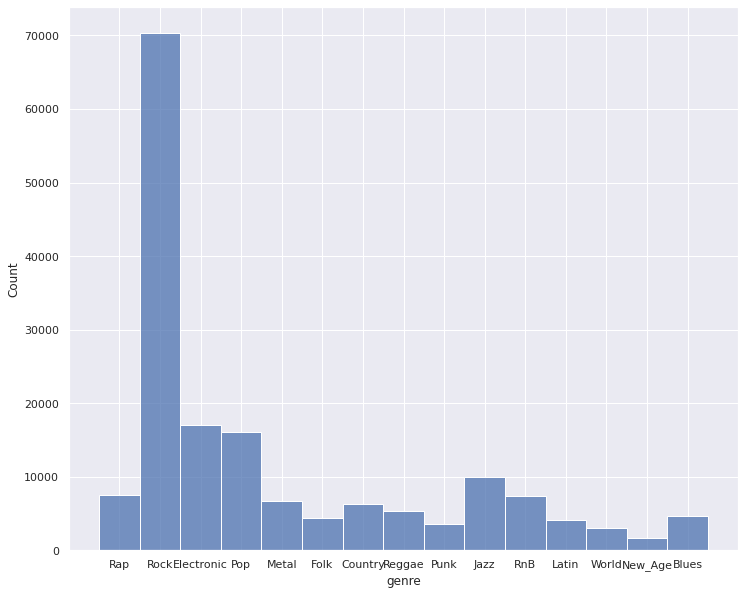

In [ ]:
print("The shape of our dataset: " + str(train.shape) + "\n\n")
value_bins = train['genre'].value_counts()
sns.set(rc={'figure.figsize':(12,10)})
sns.histplot(train["genre"])

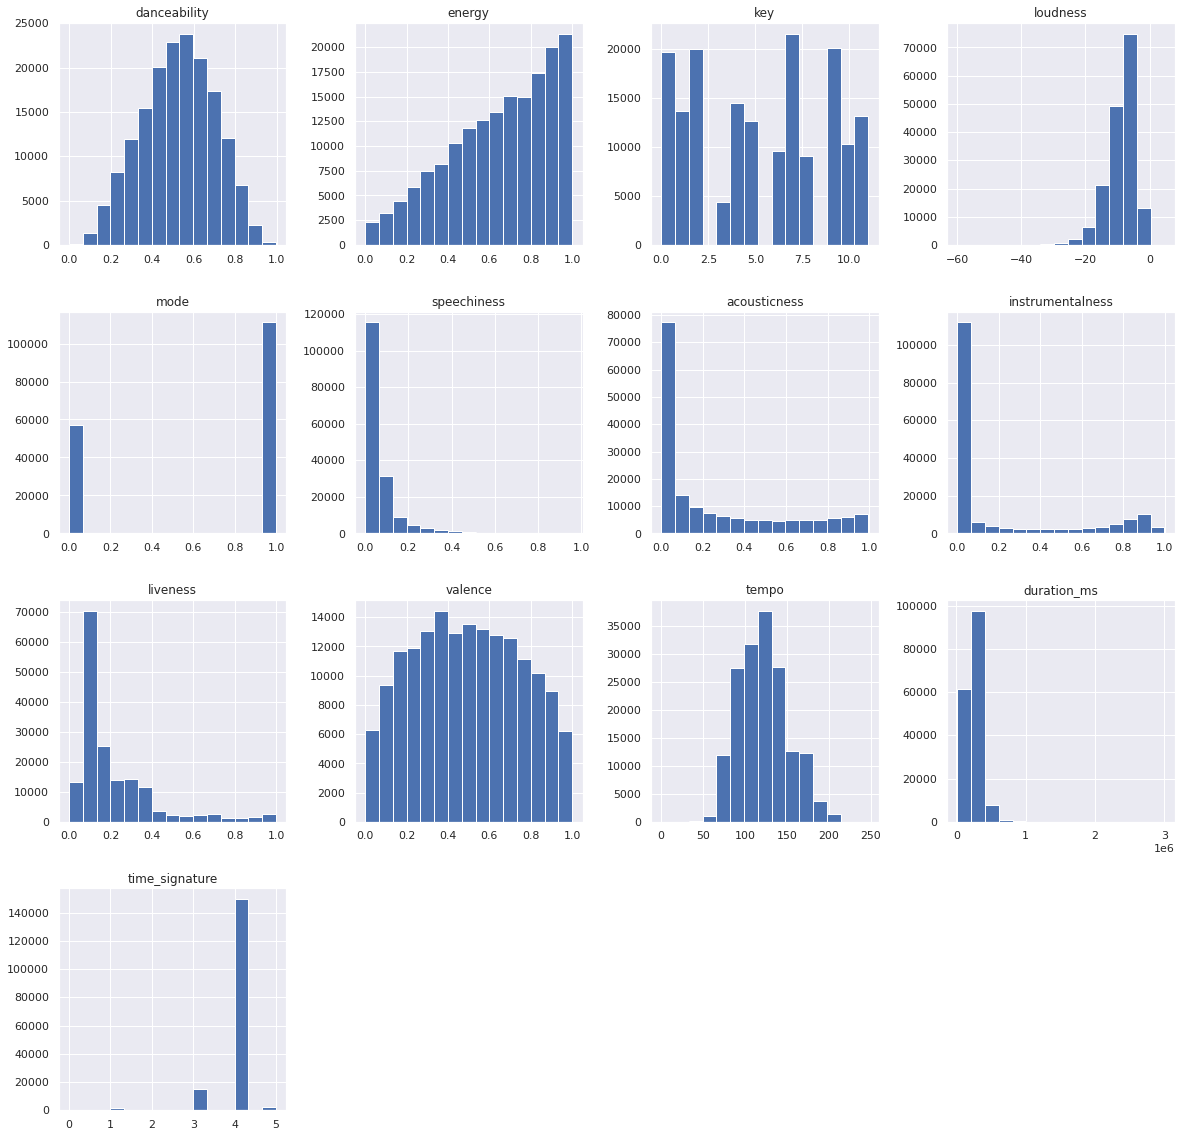

In [ ]:
train.hist(bins=15, figsize=(20, 20), layout=(4, 4));

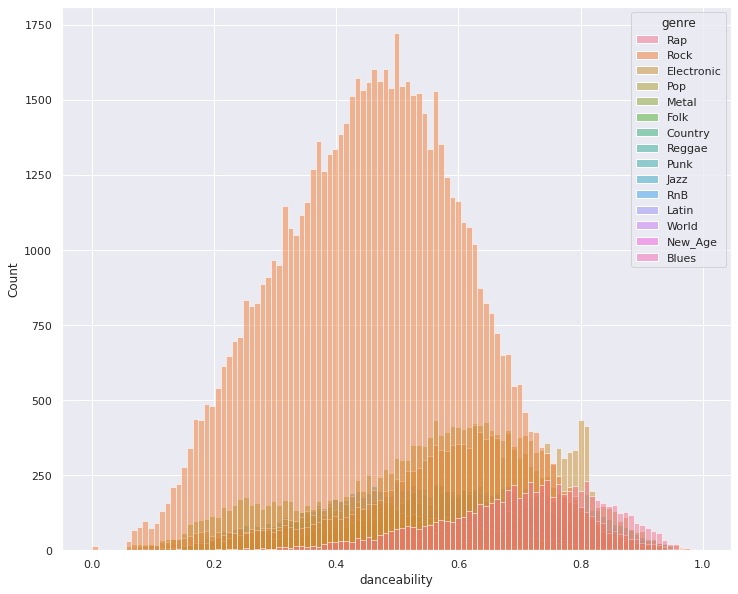

In [ ]:
sns.histplot(data=train, x="danceability", hue="genre")

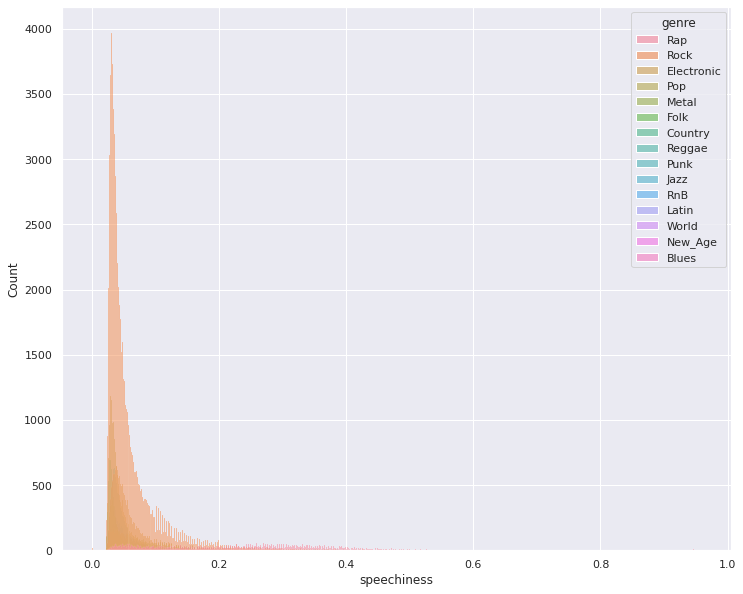

In [ ]:
sns.histplot(data=train, x="speechiness", hue="genre")

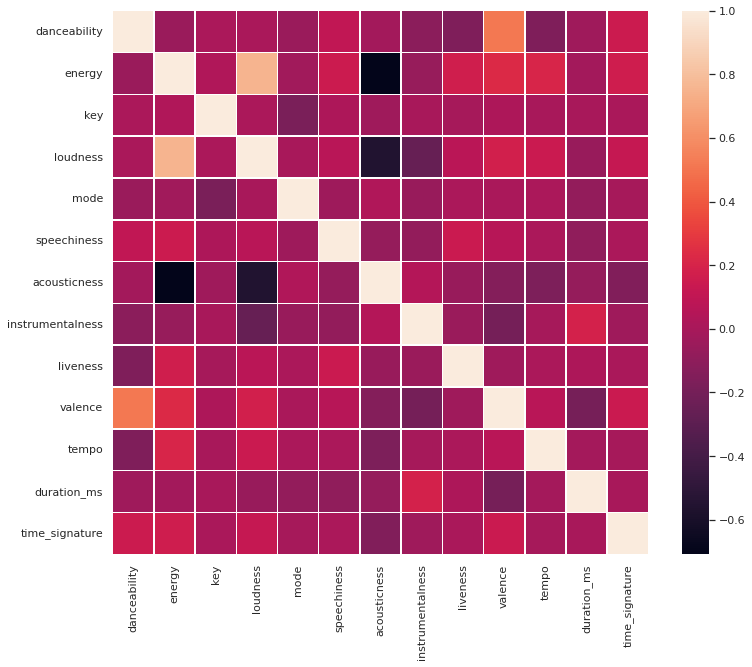

In [ ]:
ax = sns.heatmap(trainx.corr(), linewidths = .5);


In [ ]:
#Dataframe to Numpy Arrays
if isinstance(trainx, pd.DataFrame):
  trainx = trainx.to_numpy()
if isinstance(trainy, pd.DataFrame):
  trainy = trainy.to_numpy()
if isinstance(testx, pd.DataFrame):
  testx = testx.to_numpy()
if isinstance(testy, pd.DataFrame):
  testy = testy.to_numpy()

In [ ]:

#N-Fold Cross Validation (N=4)
num_folds  = 4 
N, D = trainx.shape
count = 0
for k in tqdm(range(num_folds*1000)):
  xtrain = np.concatenate((trainx[:k*(N//num_folds)],trainx[min(N,(k+1)*(N//num_folds)):]), axis = 0)
  ytrain = np.concatenate((trainx[:k*(N//num_folds)],trainx[min(N,(k+1)*(N//num_folds)):]), axis = 0)
  xval = trainx[k*(N//num_folds):min(N,(k+1)*(N//num_folds))]
  yval = trainy[k*(N//num_folds):min(N,(k+1)*(N//num_folds))]
  assert xtrain.shape[0] + xval.shape[0] == N 
  assert ytrain.shape[0] + yval.shape[0] == N



100%|██████████| 4000/4000 [00:47<00:00, 83.37it/s] 
